<a href="https://colab.research.google.com/github/YoussifAssem/Genetics/blob/main/E-Genetics/Genetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports library**

In [176]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

**Reading DataSet**

In [180]:
dS = pd.read_csv('drive/MyDrive/graduation/Alzheimers.csv')
dS.head()

,gene_name,refseq_id,miR,SNP,diseases,distance,experimentally_confirmed
0,LOC100379224,NR_033341,hsa-miR-573,rs3746319,Alzheimer's disease,0,NaN
1,LOC100379224,NR_033341,hsa-miR-185,rs4508518,Alzheimer's disease,0,NaN
2,LIPA,NM_001127605,hsa-miR-1324,rs13500,Alzheimer's disease,0,NaN
3,TRAF2,NM_021138,hsa-miR-199a-5p,rs7852970,Alzheimer's disease,0,NaN
4,TRAF2,NM_021138,hsa-miR-199b-5p,rs7852970,Alzheimer's disease,0,NaN


**Hot Encode**


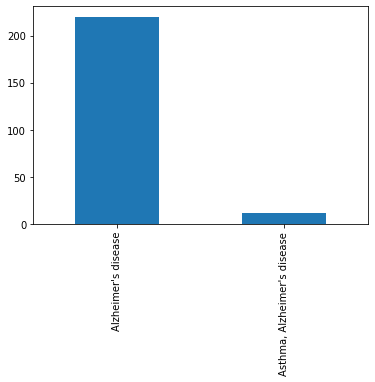

In [179]:
dS['diseases'].value_counts().plot.bar()

In [181]:

dS_pred = dS.loc[:, dS.columns != 'diseases']

dS_merged = pd.concat([dS_pred, pd.get_dummies(dS['gene_name'])], axis=1)
dS_merged = dS_merged.drop('gene_name', axis=1)


dS_merged = pd.concat([dS_pred, pd.get_dummies(dS['refseq_id'])], axis=1)
dS_merged = dS_merged.drop('refseq_id', axis=1)

dS_merged = pd.concat([dS_pred, pd.get_dummies(dS['miR'])], axis=1)
dS_merged = dS_merged.drop('miR', axis=1)

dS_merged = pd.concat([dS_pred, pd.get_dummies(dS['SNP'])], axis=1)
dS_merged = dS_merged.drop('SNP', axis=1)

dS_merged = pd.concat([dS_pred, pd.get_dummies(dS['distance'])], axis=1)
dS_merged = dS_merged.drop('distance', axis=1)


In [182]:
X_train, X_test, y_train, y_test = train_test_split(dS_merged, dS['diseases'], test_size= 0.3)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


print(dS_merged)

#print(dS.shape)
#print(dS.head()) 

ValueError: ignored